In [1]:
#Innova car studio

#Es una empresa dedicada al asesoramiento automotriz. Desarrollamos diferentes productos adaptados al negocio automovilistico, entre unos de ellos un  algoritmo que permite calcular el valor de un vehiculo ingresando algunos datos necesarios del mismo. Con este mismo sistema se va a poder tener una cotización rápida y eficaz sobre el automovil para poder tener valores estimados.
#¿Como podemos calcular el valor de un vehiculo en EE.UU.? ¿Que variables tengo que poseer de un auto para poder cotizarlo? ¿Los autos de que año tienen más demanda?

In [30]:
#Librerias que vamos a utilizar en el proyecto
import numpy as np
import pandas as pd 
import seaborn as sns
from seaborn import boxplot
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.mplot3d import Axes3D

In [31]:
#Utilice un dataset relacionado a la venta de vehiculos que es a lo que me dedico actualmente con los cuales puedo trabajar diferentes variables y lograr varios algoritmos
cars_sale = pd.read_csv("C:/vehicles.csv")
df = pd.DataFrame(cars_sale)

In [32]:
#En este proceso elimine los datos nulos, las columnas que tenian muchos datos nulos (+50%), algunas columnas que no vamos a utilizar para el modelo y eliminar los duplicados tambien
df.dropna(how='any' ,subset=['odometer', 'condition', 'type', "price", "cylinders", "drive", 'year', "transmission", "fuel", "manufacturer"], inplace=True)
df = df.drop(["id", "posting_date", "state", "model", "url", "region", 'region_url', 'title_status', 'VIN', 'size', 'paint_color', 'image_url', 'description', 'county',  'lat', 'long'], axis=1)
#La columna model en particular la elimine por que la diversidad de datos cargados era tan grande que un mismo vehiculo se llamaba de diversas formas por lo cual habria que limpiar durante mucho tiempo
#Entendiendo que puede haber dos vehiculos con las mismas caracteristicas duplicados, el numero de ID deberia ser el mismo en el caso de estar duplicado.
df.drop_duplicates()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck
32,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,other,4wd,pickup
33,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,other,4wd,pickup
34,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,automatic,4wd,truck
35,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,other,4wd,pickup
...,...,...,...,...,...,...,...,...,...,...
426762,7000,1982.0,mazda,excellent,other,gas,80000.0,automatic,rwd,coupe
426808,18000,2005.0,chevrolet,excellent,8 cylinders,gas,130000.0,automatic,4wd,truck
426809,18000,1990.0,jeep,good,8 cylinders,gas,114400.0,automatic,4wd,SUV
426831,9800,1985.0,nissan,like new,6 cylinders,gas,115000.0,automatic,rwd,hatchback


In [33]:
#considerando que hay precios muy elevados en los datos decidi acotar los valores en estos 3 fabricantes. 
d2 = df[(df['manufacturer'] == ("dodge")) | (df['manufacturer'] == ("mercedes-benz")) | (df['manufacturer'] == ("subaru"))]
#La division del dataset en esta parte es para eliminar datos con poco sentido como autos con un valor inferior a $1000 ya que seria algo irreal
autos = d2[d2.price > 1000]
#tambien se filtran autos con valores y años para poder logar un modelo de autos etandares comerciales, luego analizar los datos atipicos o fuera de lo comun como una categoria aparte
autos_nuevos = autos[(autos.price <150000) & (autos.year>1980) & (autos.year <2021) & (autos['fuel'] != ("other")) & (autos.odometer <250000)]

In [34]:
#eliminar valores de tipo 11111, 0, 9999, etc
autos_nuevos = autos_nuevos[autos_nuevos.price > 500]
autos_nuevos = autos_nuevos[(autos_nuevos['price'] != 123456) & (autos_nuevos['price'] != 1234) & (autos_nuevos['price'] != 1111) & (autos_nuevos['price'] != 3333) & (autos_nuevos['price'] != 12345) & (autos_nuevos['price'] != 4444)]

In [35]:
#codigo que analiza los distintos valores que contienen el nombre "x" para poder ir visualizano por ejemplo el valor "Any make any model" en la columna model los cuales eliminamos
autos_nuevos[autos_nuevos['drive'].str.contains("4wd")].value_counts("drive")

drive
4wd    4551
dtype: int64

In [36]:
#EDA analisis exploratorio de datos
#En estos resultados podemos describir que tipos de datos estamos trabajando
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130702 entries, 31 to 426878
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         130702 non-null  int64  
 1   year          130702 non-null  float64
 2   manufacturer  130702 non-null  object 
 3   condition     130702 non-null  object 
 4   cylinders     130702 non-null  object 
 5   fuel          130702 non-null  object 
 6   odometer      130702 non-null  float64
 7   transmission  130702 non-null  object 
 8   drive         130702 non-null  object 
 9   type          130702 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.0+ MB


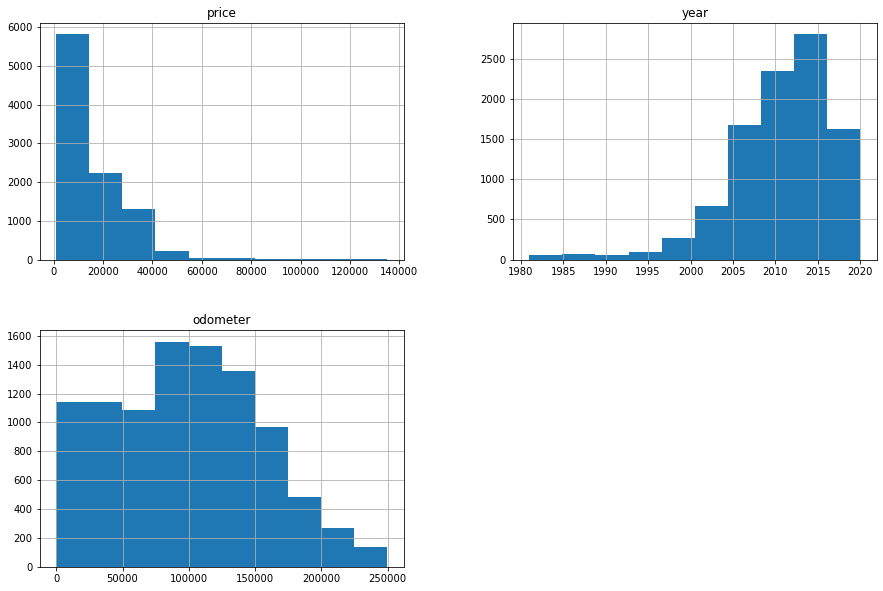

In [37]:
#Visualizamos rápidamente las caraterísticas de entrada
autos_nuevos.hist()
plt.show()

Text(0.5, 1.0, 'Cantidad de autos segun el año')

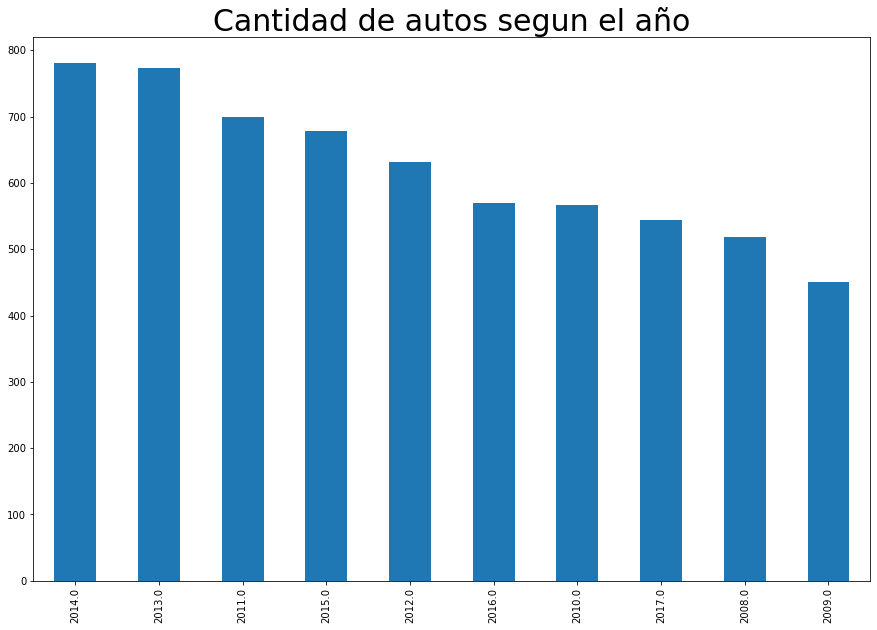

In [38]:
#Diferentes tipos de analisis
#Analisis univariado
plt.rcParams['figure.figsize'] = (15, 10)
autos_nuevos['year'].value_counts().head(10).plot.bar()
plt.title('Cantidad de autos segun el año', fontsize = 30)

C:\Users\alepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Boxplto sobre precios de vehiculos'}, xlabel='price'>

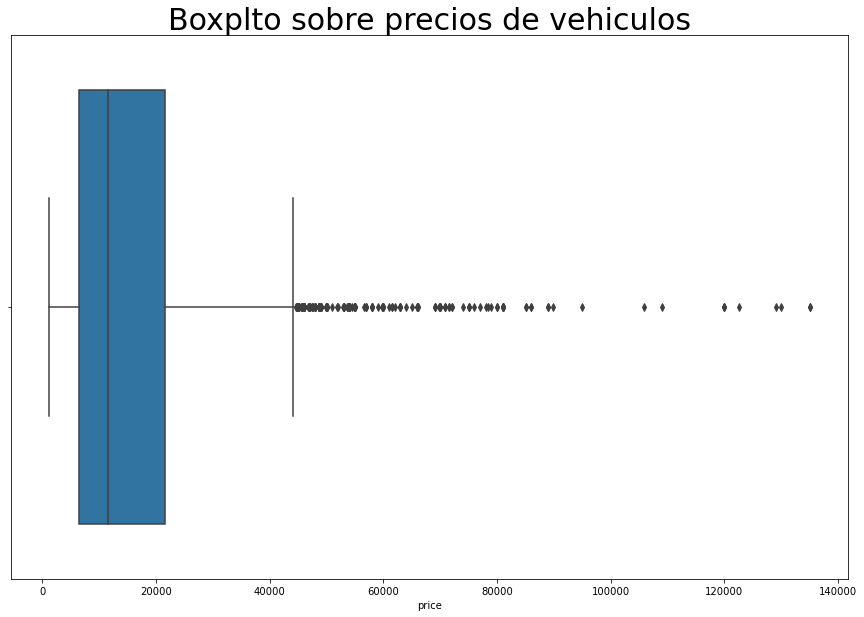

In [39]:
#Analisis univariado
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Boxplto sobre precios de vehiculos', fontsize = 30, fontweight = 30)
boxplot(autos_nuevos.price ,orient="Vertical")

<AxesSubplot:title={'center':'Vehiculos segun el año'}, ylabel='Frequency'>

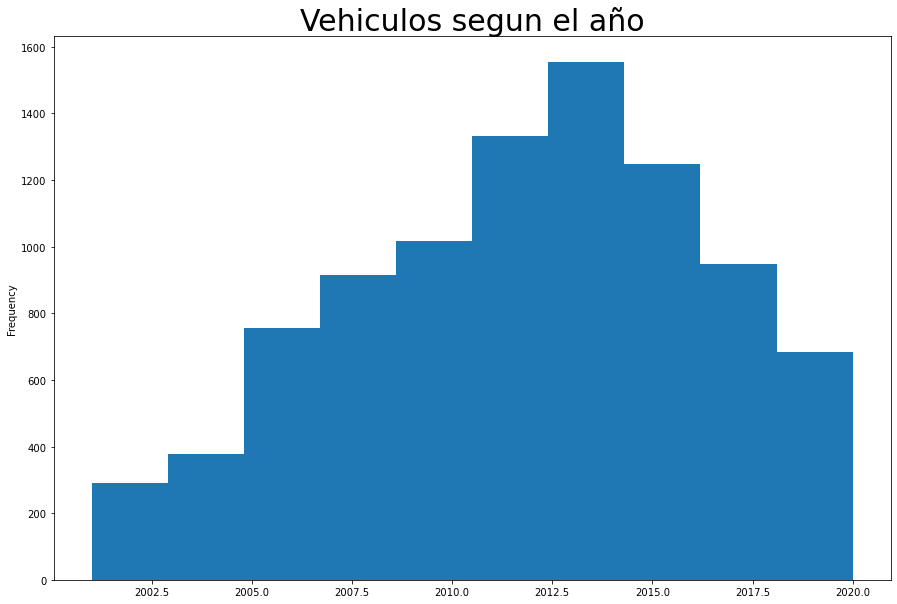

In [40]:
#Analisis univariado
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Vehiculos segun el año', fontsize = 30, fontweight = 30)
autos_nuevos[autos_nuevos['year'] > 2000]['year'].plot.hist()

C:\Users\alepa\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\alepa\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\alepa\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


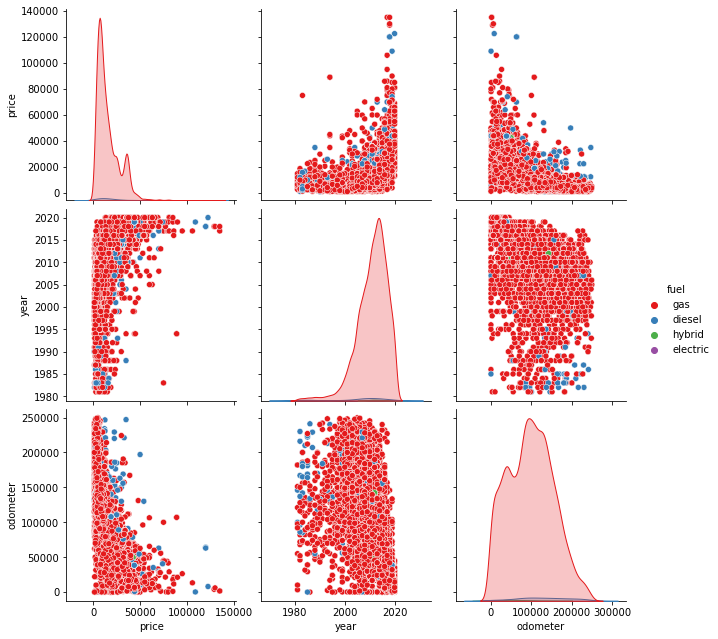

In [41]:
#Analisis multivariado
sns.pairplot(autos_nuevos,hue = 'fuel' , height = 3 , palette = 'Set1')

In [42]:
autos_nuevos.value_counts("manufacturer")

manufacturer
dodge            3946
mercedes-benz    2879
subaru           2842
dtype: int64

In [43]:
autos_grafico = autos[autos.year>2000]
autos_grafico2 = autos_grafico[autos_grafico.price<100000]

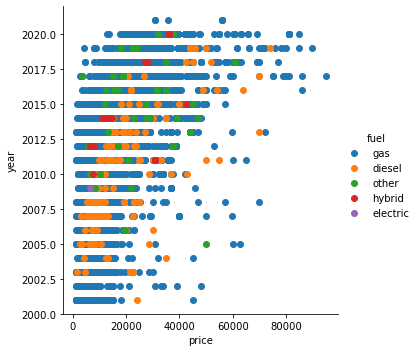

In [44]:
#Analisis bivariado
sns.FacetGrid(autos_grafico2,hue = 'fuel' , height = 5).map(plt.scatter,'price','year').add_legend();
plt.show()

In [45]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

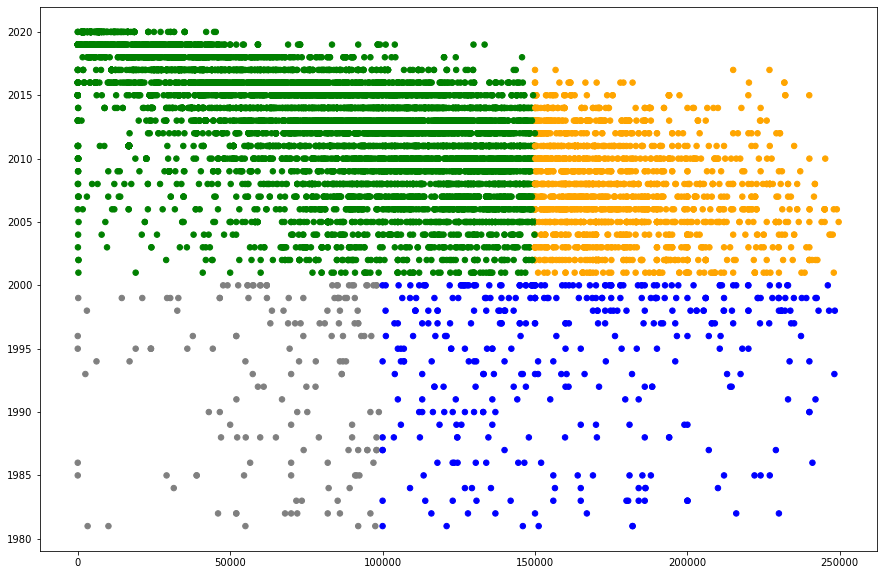

In [46]:
#Aca podemos apreciar dos variables, el año y la cantidad de kilometraje de los autos 
f1 = autos_nuevos['odometer'].values
f2 = autos_nuevos['year'].values

colores=['orange','blue',"grey","green"]
tamanios=[30,60]
asignar=[]
for index, row in autos_nuevos.iterrows():
    if((row['odometer']>=150000) & (row['year']>2000)):
        asignar.append(colores[0])
    elif((row['odometer']>=100000) & (row['year']<=2000)):
        asignar.append(colores[1])
    elif((row['odometer']<100000) & (row['year']<=2000)):
        asignar.append(colores[2])
    else:
        asignar.append(colores[3])
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()
#Segun el año y el quilometraje de los vehiculos podemos apreciar que la mayor demanda de vehiculos a la venta se encuentra en el bloque color verde, tambien podemos ver que entre los colores verde y amarillo, los cuales pertenecen a los autos modelo 2000 hacia arriba. 

In [47]:
autos_previo = autos_nuevos.drop(["drive", "cylinders"], axis=1)
autos_getdummies_previo = pd.get_dummies(autos_previo)

In [48]:
#Asignamos nuestra variable de entrada
dataX = autos_getdummies_previo.loc[:, autos_getdummies_previo.columns !="price"]
X_train = dataX
y_train = autos_getdummies_previo['price'].values

#Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
#Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
#Hacemos las predicciones que en definitiva una línea
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [ 6.95770163e+02 -8.62251799e-02 -1.62417619e+03  4.18857034e+03
 -2.56439415e+03 -1.70177279e+03 -1.18896777e+03 -9.48349100e+02
 -2.48174131e+01  7.48609931e+03 -3.62219224e+03  6.26939614e+03
 -1.77370702e+03 -2.31990470e+03 -2.17578442e+03 -3.30694763e+03
 -4.82026215e+02  3.78897384e+03 -1.19409793e+03 -7.00908618e+02
  3.32345163e+03  2.38160077e+03 -2.75114091e+03 -2.93142533e+03
  2.24024780e+03 -9.57918807e+02  2.11357465e+03 -2.09538490e+03
  2.83630672e+03 -1.03736971e+03 -1.22693537e+03]
Independent term: 
 -1368336.6521322306
Mean squared error: 58949804.64
Variance score: 0.63


In [49]:
autos_getdummies = pd.get_dummies(autos_nuevos)

In [50]:
#Primero hice un test sin las columnas "drive", "cylinder" y "Cilinder". Agregando estas dos dimensiones se ajusto el dataset generando un algoritmo mas eficaz
dataX = autos_getdummies.loc[:, autos_getdummies.columns !="price"]
X_train = np.array(dataX)
y_train = autos_getdummies['price'].values

regr = linear_model.LinearRegression()
 
regr.fit(X_train, y_train)
 
y_pred = regr.predict(X_train)

z_pred = regr.predict(dataX)
 
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [ 7.87674824e+02 -7.88441146e-02 -1.53777389e+03  3.16090998e+03
 -1.62313609e+03 -1.54122002e+03 -1.08774973e+03 -1.04945584e+03
  6.78886028e+01  7.00933142e+03 -3.39879444e+03  1.38937221e+04
  4.68591745e+03 -6.48237300e+03 -5.15000414e+03 -1.77511990e+03
 -5.05833970e+03  2.28111707e+03 -2.39491986e+03  7.01250195e+03
 -1.48768074e+03 -2.69592411e+03 -2.82889710e+03 -2.42408543e+03
  6.11959273e+02  1.81212615e+03  1.05737737e+03 -2.43520838e+03
  1.37783101e+03 -1.38750987e+03  5.66952691e+02  1.91768672e+03
 -5.93432919e+02 -1.97303887e+03  9.72441508e+02  2.28899150e+03
 -3.54379540e+02 -1.12825012e+03 -2.31323321e+03  3.43761906e+02
  2.71953248e+03 -1.05952227e+03]
Independent term: 
 -1551338.6514473525
Mean squared error: 49764508.86
Variance score: 0.69


In [51]:
#Componentes principales a analizar serian, precio, fabricante, año , kilometraje, combustible
#Viendo que los valores de los modelos varian mucho segun el mismo vehiculo, dado que cada usuario ingresaba el nombre del modelo como lo interpretaba voy a acotar los datos a diferentes manufacturadores especoficos como mercedes-benz, dodge, subaru; llegando a un total de 30.000 datos en vez de 420.000 datos
#Esto es dado a que la lipieza de los datos llevaria mucho tiempo para poder normalizarlos, la idea de la herramienta seguiria siendo la misma solamente acotada a diferentes fabricantes.
#El objetivo concreto seria cotizar el valor de un vehiculo de algunas de estas marcas presentadas anteriormente diferenciando cada modelo por las variables, año, kilometraje, precio, fabricante, combustible, cilindros y drive.